## License plate detection model YOLOv8 using OCR

This notebook is intended for testing the weights obtained from the training process. The training data set consisted of approximately 258 images, and data augmentation was applied to increase the size of the data set. The purpose of data augmentation was to enhance the overall performance of the model. The data set was divided into three parts for training, validation, and testing, with the percentages of 70%, 17%, and 13%, respectively. 


**Training Process:** We trained our data using various epoch batch-sizes and optimizers. Initially, we trained the model for 75 epochs, but we found that it was underfitted since the training loss was increasing while the validation loss remained constant. The accuracy curve also did not show any improvement. Next, we increased the epoch value to 150, but this led to overfitting as there was a significant difference between the training and validation accuracy. To overcome overfitting, we used early stopping which is a good technique for this problem. Eventually, we found that training the model for 100 epochs yielded a 94% accuracy, and the model performed well in several epochs. We used the standard batch size of 16, which was suggested by the pretrained YOLOb8 weights, and kept the patience value at 50, along with the SGD optimizer.

**Data augmentation:** In order to improve the accuracy of license plate detection on our dataset, we applied several effective image augmentation techniques. First, we used random cropping, this technique involves randomly cropping the input image to create multiple variations of the same image, therefore it can help the model generalize better by introducing more variability in the training data, and it can also help reducing overfitting. Further, we applied rotation, as it can teach the model to detect slightly tilted or angled license plates, it can also help to improve the model's ability to handle images that are not perfectly aligned. Moreover, we applied exposure, due to the fact that exposure can help the model better handle images with different lighting conditions, and Gaussian blur can reduce the effect of noise and improve the detection of partially obscured plates. By using a combination of these augmentations, the license plate detection model can become more accurate and robust, better able to handle real-world scenarios.

Based on the achieved 94% accuracy, we can safely assume that our license plate detection model is performing well. Furthermore, we enhanced the images to improve the readability of the number plates using OCR (Optical Character Recognition) technology. Allowing it to identify the characters on the number plates. However, in low-resolution images, the model may encounter some difficulties in reading the characters correctly. Overall, we can be confident in the performance of our model and its ability to accurately recognize license plates.

### Training of the model on the data
We used Google Colab to train our dataset on the YoloV8 model, which provided a GPU that significantly accelerated the training process. In this Colab notebook, you will find various monitoring diagrams, such as confusion matrix, training and validation results. If you are interested in reviewing the training process, you can find the link to the Google Colab below.

https://colab.research.google.com/drive/1OQL3Og_VfS3f3ZVt5OZ1Tb1z4GrHCx_l?usp=sharing

Install Yolo 

In [1]:
try:
    from ultralytics import YOLO
    %cd ultralytics/
    print('ultralytics already installed, only imported')
except:
    !git clone https://github.com/ultralytics/ultralytics
    %cd ultralytics
    !pip install -e ultralytics
    import ultralytics
    ultralytics.checks()
    print('ultralytics was not installed, installed and imported')


C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics
ultralytics already installed, only imported


Import packages 

In [7]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

import cv2
import easyocr
from PIL import Image
import random 
import matplotlib.pyplot as plt

NumPy already installed, only imported


### Use the weights of the model 

#### The model can be accessed from this Colab link: 
https://colab.research.google.com/drive/1OQL3Og_VfS3f3ZVt5OZ1Tb1z4GrHCx_l?usp=sharing

In [50]:
%pwd
model = YOLO('best.pt')

Test the results 

In [51]:
results =  model.predict('TEST_DATA/images/') 

# results =  model.predict('TEST_DATA/test-video.mp4' , save=True) # video can be tested like this


image 1/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics\TEST_DATA\images\16_jpg.rf.e13484e0fde6b657a041a2bf0e528aa9.jpg: 640x640 1 license-plate, 798.0ms
image 2/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics\TEST_DATA\images\20_jpg.rf.fdd34d8378b411375c4dea2eff3968d5.jpg: 640x640 1 license-plate, 536.0ms
image 3/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics\TEST_DATA\images\4_jpg.rf.5546256c668ec2b5315c959bd928fabb.jpg: 640x640 1 license-plate, 1311.5ms
image 4/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics\TEST_DATA\images\MicrosoftTeams-image (1).png: 480x640 1 license-plate, 1534.0ms
image 5/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSINT\YoloLPModel\ultralytics\TEST_DATA\images\MicrosoftTeams-image (2).png: 480x640 1 license-plate, 1547.8ms
image 6/8 C:\Users\RPS\Desktop\School InHolland\3rd Year\Project OSI

In [24]:
results

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'license-plate'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],


### Image enhancement and reading the license plates using OCR.
In order to improve the accuracy of OCR we have to apply image filters on license plates as filters can help by reducing noise, enhancing contrast, and increasing clarity. After getting the results from our yolov8 model, we crop the original image to only get the bounding box of the license plate based on the coordinates we get from the prediction. Further, now that we have a cropped image with only the license plate, we can apply filters. We tried multiple filters such as edge detection, Gaussian blur, thresholding, morphological operations (dilation and erosion), and grayscale. However, some filters didn't perform as expected and didn't provide the desired results for instance: Gaussian blur and edge detection, therefore we had to remove them. Furthermore, morphological and thresholding performed better than previous filters, however if we combine both it would not give us the ideal results. Further, combining grayscale with morphological or thresholding always resulted in better results. At the end, we decided to use thresholding combined with grayscale, as it performed better than the other filters

In [29]:
reader = easyocr.Reader(['en'] , gpu = True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


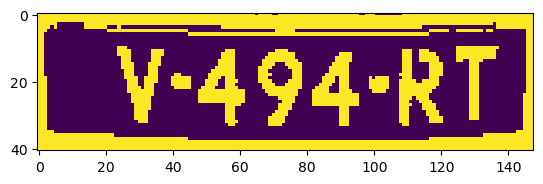

V-494-RT


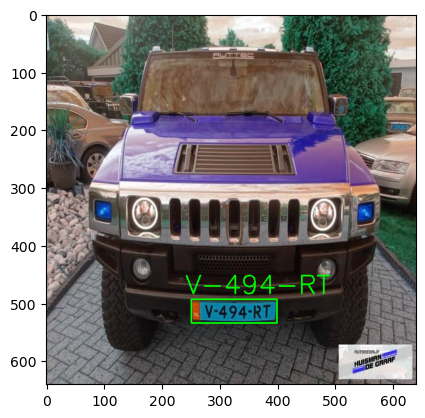

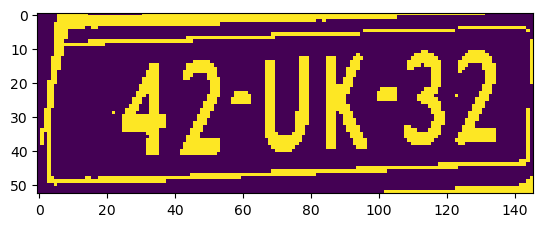

42 UK 32


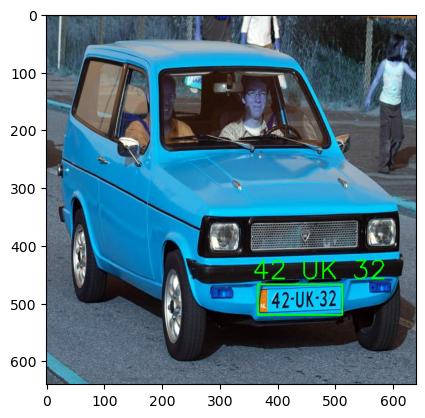

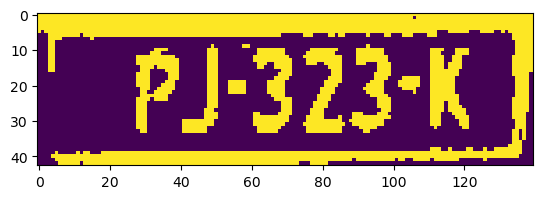

PJ323K


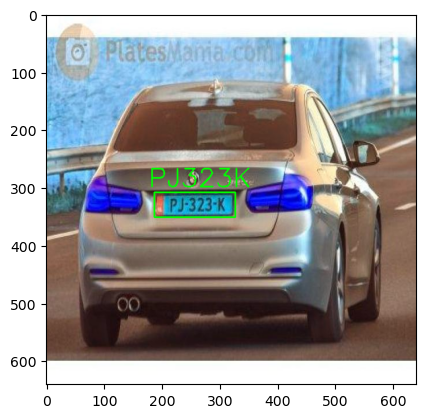

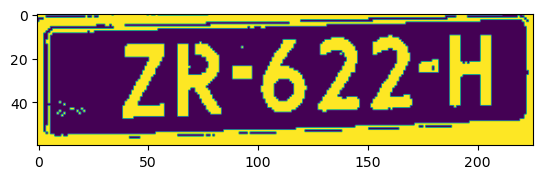

ZR-622-H


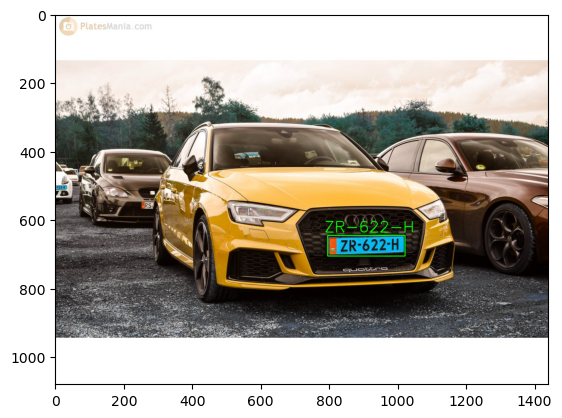

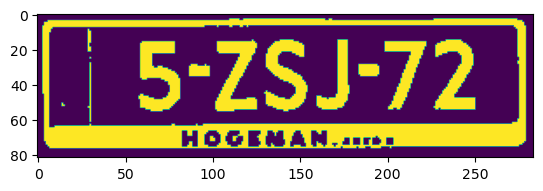

5-2SJ-72


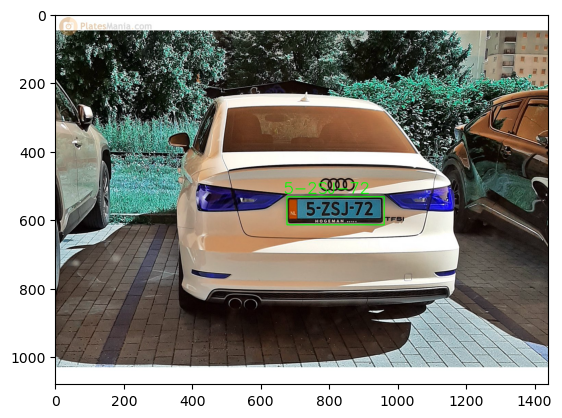

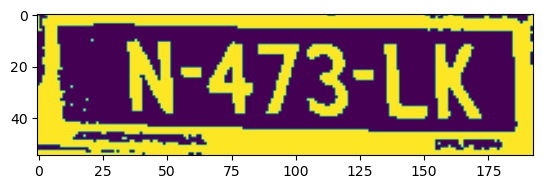

N-473-LK


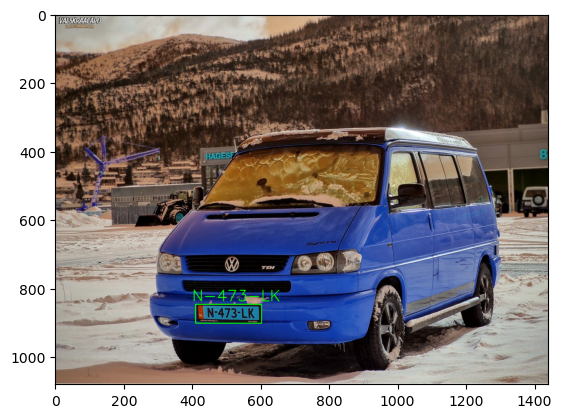

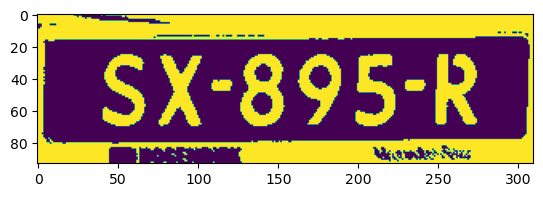

SX-895-R


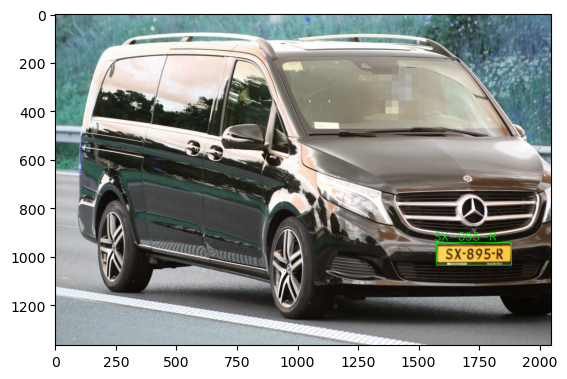

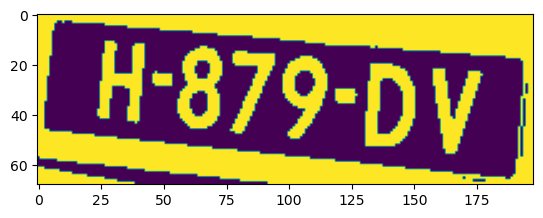

H879-DV


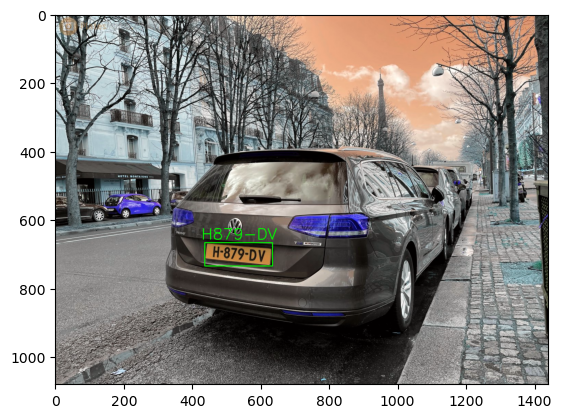

In [52]:
# process all the results by enhancing the pixels and performing OCR to read the license plates.

for r in results:
    boxes = r.boxes
    for box in boxes:
            
        b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        c = box.cls
          
        x,y,w,h = int(b[0]), int(b[1]), int(b[2]), int(b[3])
        img = r.orig_img[y:h , x:w]
        
             
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
               
        
        # Apply threshold
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        plt.imshow(thresh)
        plt.show()
        
        
        #ocr
        result = reader.readtext(thresh)    
            
        text = ""
    
        for res in result:
            if len(result) == 1:
                text = res[1]
    
            if len(result) > 1 and len(res[1]) > 6 and res[2] > 0.2:
                text = res[1]

        print(text)
        
        cv2.rectangle(r.orig_img, (x, y), (w, h), (0, 255, 0), 2) # draw green rectangle
        
        cv2.putText(r.orig_img, text, (x-10, y-10),cv2.FONT_HERSHEY_SIMPLEX, 1.5,(0, 255, 0), 2) # add green text
        plt.imshow(r.orig_img)
        plt.show()
            
            
